In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [13]:
import pandas as pd

# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Looked at?', 
    'Relevant?', 
    'Year', 
    'Time Complexity Class',
    'Approximation Factor Class (Mult)', 
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',	
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)'
]
approximation_algorithms = pd.read_csv('approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data

# look for relevant + non-0.001 ones
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != "0.001"]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] == 1]


approximation_algorithms['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

for col in ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']:
    approximation_algorithms[col] = pd.to_numeric(approximation_algorithms[col].astype(str).str.extract(r'(\d+\.?\d*)')[0], errors='coerce').fillna(99999)
    approximation_algorithms[col] = approximation_algorithms[col].replace(0, 99999)

# Sort the DataFrame for correct group-wise comparison
approximation_algorithms.sort_values(by=['Family Name', 'Variation', 'Year'], inplace=True)

approximation_algorithms['Improvement'] = 0
# Identify improvements
def identify_improvements(group):
    # Ensure necessary columns are present
    necessary_columns = ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']
    if not all(col in group.columns for col in necessary_columns):
        raise ValueError("Missing one or more necessary columns")

    # Initialize 'Improvement' column and 'Best_' columns safely
    group['Improvement'] = 0
    for col in necessary_columns:
        group['Best_' + col] = 999999

    # Initialize best values for the first row
    for col in necessary_columns:
        group['Best_' + col].iat[0] = group[col].iat[0]
        group['Improvement'].iat[0] = 0

    # Compute best values and track improvements
    for i in range(1, len(group)):
        for col in necessary_columns:
            previous_best = group['Best_' + col].iat[i - 1]
            current_value = group[col].iat[i]

            if current_value < previous_best:
                group['Best_' + col].iat[i] = current_value
                group['Improvement'].iat[i] = 1
            else:
                group['Best_' + col].iat[i] = previous_best

    # Drop helper columns
    drop_cols = ['Best_' + col for col in necessary_columns]
    group.drop(columns=drop_cols, inplace=True)

    return group


approximation_algorithms = approximation_algorithms.groupby(['Family Name', 'Variation']).apply(identify_improvements)

approximation_algorithms['Improvement'] = approximation_algorithms['Improvement'].astype(int)

approximation_algorithms


/var/folders/lx/jxx7wnmn4q5g51lkvkx6hndc0000gn/T/ipykernel_6981/899883452.py:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  group['Best_' + col].iat[0] = group[col].iat[0]
/var/folders/lx/jxx7wnmn4q5g51lkvkx6hndc0000gn/T/ipykernel_6981/899883452.py:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.04' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  group['Best_' + col].iat[0] = group[col].iat[0]
/var/folders/lx/jxx7wnmn4q5g51lkvkx6hndc0000gn/T/ipykernel_6981/899883452.py:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.01' has dtype incompatible with int64, please explicitly cast to a compatible dtype

Family Name  \
Family Name                     Variation                                                                                 
All-Pairs Shortest Paths (APSP) APSP, unweighted, undirected, no FMM (Approximate) 148  All-Pairs Shortest Paths (APSP)   
                                                                                   149  All-Pairs Shortest Paths (APSP)   
                                                                                   150  All-Pairs Shortest Paths (APSP)   
                                                                                   151  All-Pairs Shortest Paths (APSP)   
                                                                                   152  All-Pairs Shortest Paths (APSP)   
...                                                                                                                 ...   
kth Order Statistic             Approximate kth Order Statistic                    7                kth Order Statistic   
                                                                                   8                kth Order Statistic   
                                                                                   9                kth Order Statistic   
                                                                                   10               kth Order Statistic   
n-Queens Problem                n-Queens Completion                                864                 n-Queens Problem   

                                                                                       Looked at?  \
Family Name                     Variation                                                           
All-Pairs Shortest Paths (APSP) APSP, unweighted, undirected, no FMM (Approximate) 148          1   
                                                                                   149          1   
                                                                                   150          1   
                                                                                   151          1   
                                                                                   152          1   
...                                                                                           ...   
kth Order Statistic             Approximate kth Order Statistic                    7        0.001   
                                                                                   8        0.001   
                                                                                   9        0.001   
                                                                                   10       0.001   
n-Queens Problem                n-Queens Completion                                864      0.001   

                                                                                        Relevant?  \
Family Name                     Variation                                                           
All-Pairs Shortest Paths (APSP) APSP, unweighted, undirected, no FMM (Approximate) 148        1.0   
                                                                                   149        1.0   
                                                                                   150        1.0   
                                                                                   151        1.0   
                                                                                   152        1.0   
...                                                                                           ...   
kth Order Statistic             Approximate kth Order Statistic                    7          1.0   
                                                                                   8          1.0   
                                                                                   9          1.0   
                                                                                   

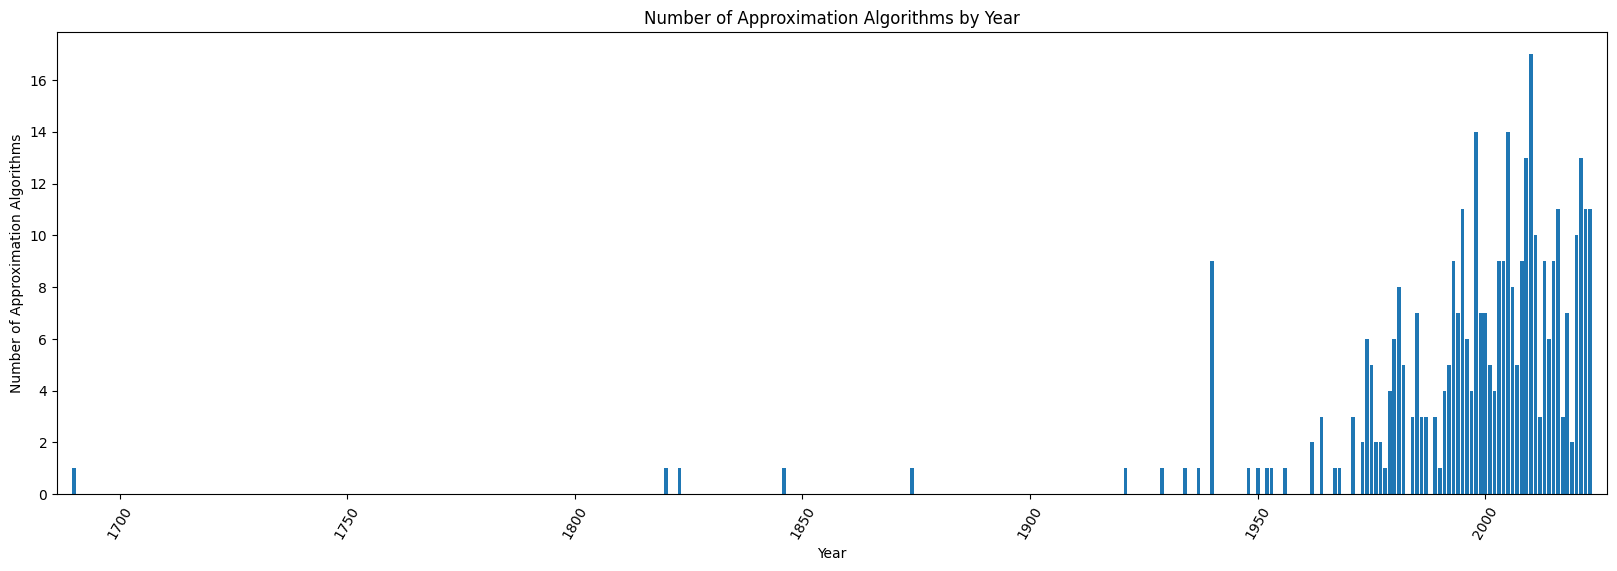

In [3]:
# Plot number of approximation algorithms by year
data = approximation_algorithms

data = data.groupby(['Year']).size()

fig, ax = plt.subplots()
bar_container = ax.bar(data.index, data.values)
# set figure size
fig.set_size_inches(20, 6)
plt.xticks(rotation=60)

plt.margins(x=0.01)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Year')
plt.show()

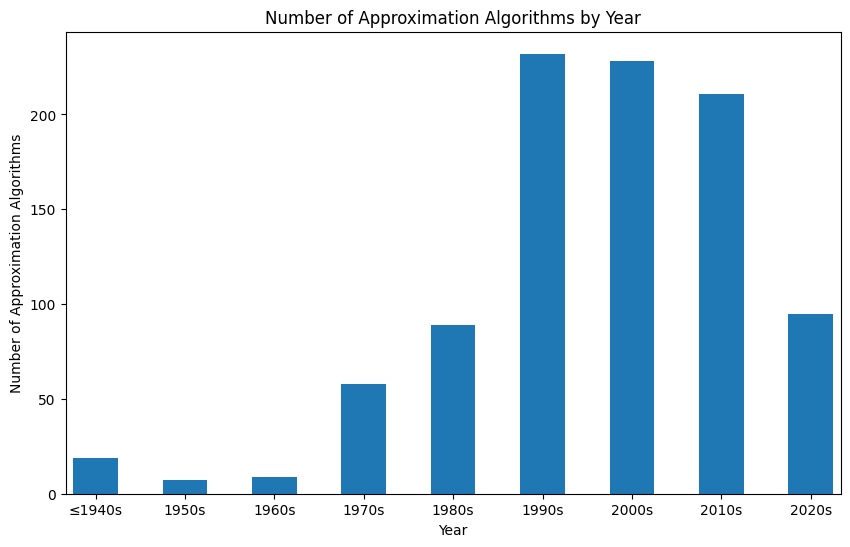

In [22]:
# Plot number of approximation algorithms by decade
data = approximation_algorithms

data = data.groupby(data['Year'] // 10 * 10).size()

# merge all year <= 1940 into 1940
data[1940] = data.loc[:1940].sum()
data = data.drop(data.loc[:1939].index)







fig, ax = plt.subplots()

bar_container = ax.bar(data.index, data.values, width=5)

# set figure size
fig.set_size_inches(10, 6)

plt.margins(x=0.01)



ax.set_xticks(data.index)
ax.set_xticklabels(['≤1940s'] + [str(year) + 's' for year in data.index[1:]])

ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Year')
plt.show()

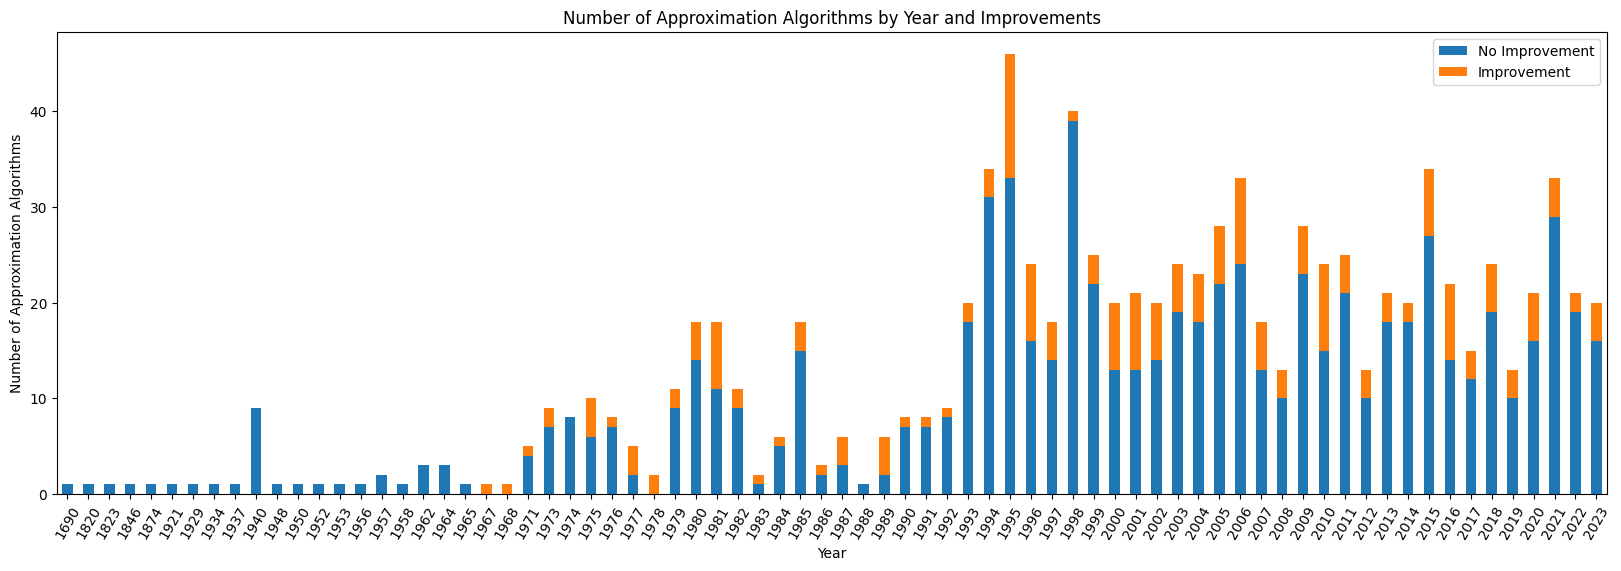

In [18]:
# Plot number of approximation algorithms by year and improvements
data = approximation_algorithms

data = data.groupby(['Year', 'Improvement']).size().unstack().fillna(0)

fig, ax = plt.subplots()
data.plot(kind='bar', stacked=True, ax=ax)
# set figure size
fig.set_size_inches(20, 6)
plt.xticks(rotation=60)

plt.margins(x=0.01)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Year and Improvements')

# legent for the plot
plt.legend(['No Improvement', 'Improvement'])

plt.show()






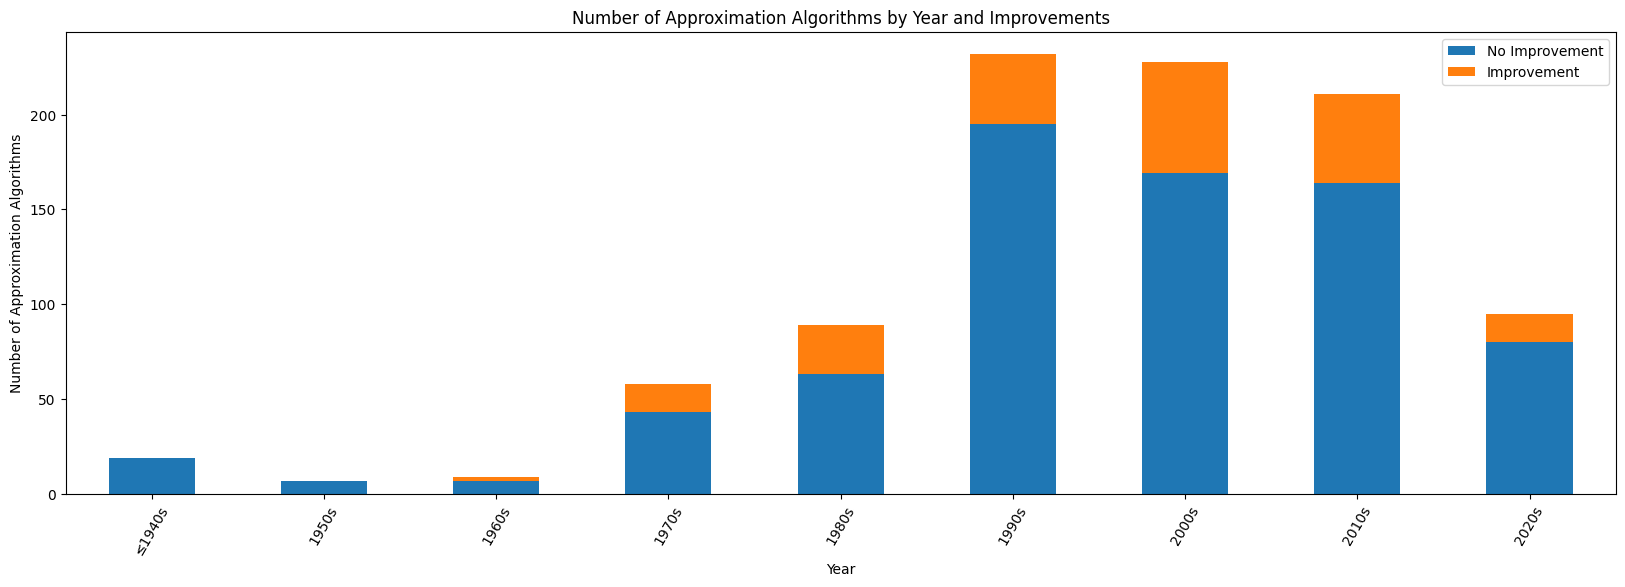

In [21]:
# Plot number of approximation algorithms by decade and improvements
data = approximation_algorithms

data = data.groupby([data['Year'] // 10 * 10, 'Improvement']).size()

# merge all year <= 1940 into 1940
data[1940] = data.loc[:1940].sum()
data = data.drop(data.loc[:1939].index)

data = data.unstack().fillna(0)

fig, ax = plt.subplots()
data.plot(kind='bar', stacked=True, ax=ax)
# set figure size
fig.set_size_inches(20, 6)
plt.xticks(rotation=60)

plt.margins(x=0.01)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Approximation Algorithms')
ax.set_title('Number of Approximation Algorithms by Year and Improvements')

ax.set_xticklabels(['≤1940s'] + [str(year) + 's' for year in data.index[1:]])

# legent for the plot
plt.legend(['No Improvement', 'Improvement'])

plt.show()






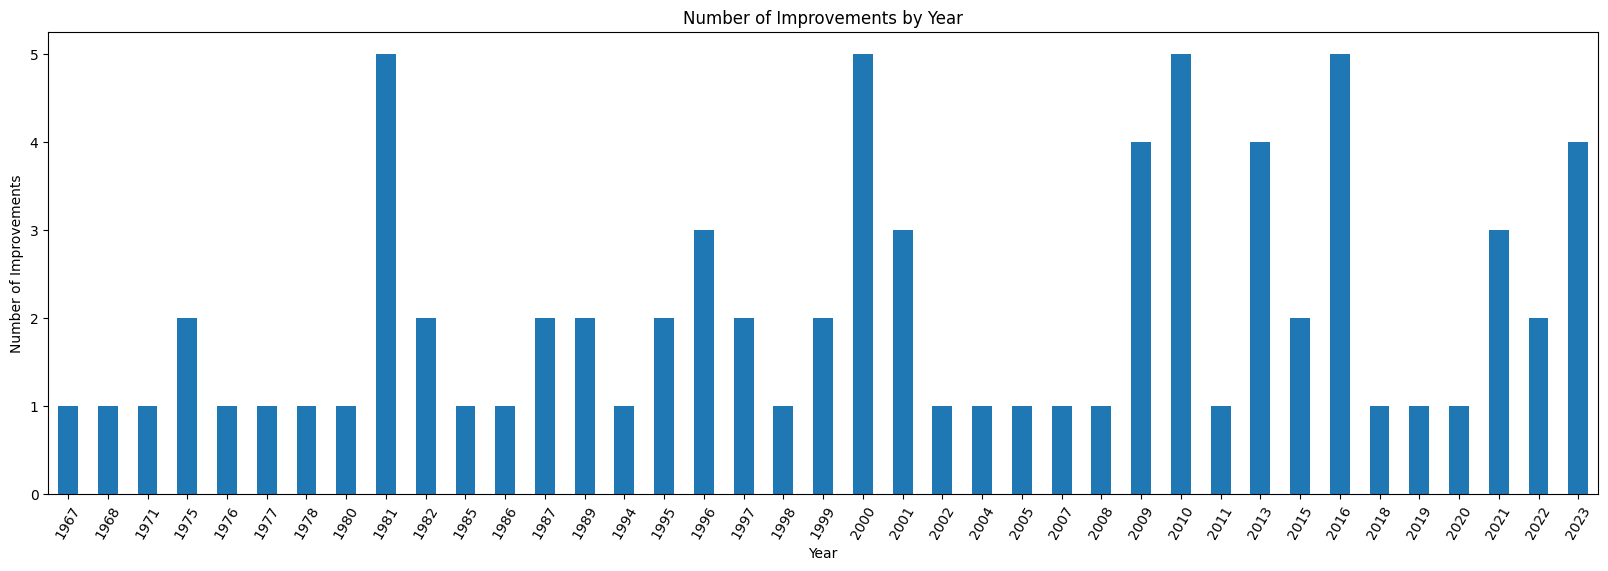

In [7]:
# Plot number of improvements by year
data = approximation_algorithms


        
# plot only  improvements by year

data = data[data['Improvement'] == 1]

data = data.groupby(['Year']).size()





fig, ax = plt.subplots()
data.plot(kind='bar', stacked=True, ax=ax)
# set figure size
fig.set_size_inches(20, 6)
plt.xticks(rotation=60)

plt.margins(x=0.01)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Improvements')
ax.set_title('Number of Improvements by Year')
plt.show()


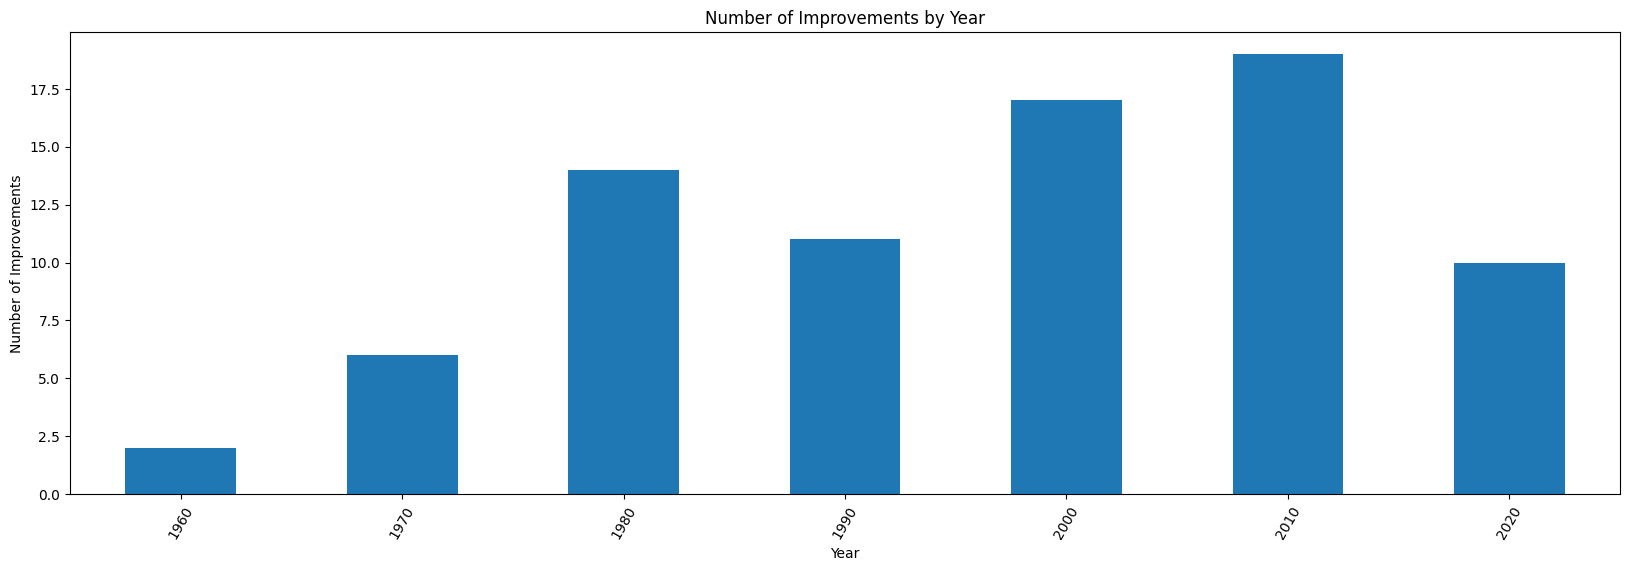

In [8]:
# Plot number of improvements by decade
data = approximation_algorithms


        
# plot only  improvements by year

data = data[data['Improvement'] == 1]

data = data.groupby(data['Year'] // 10 * 10).size()





fig, ax = plt.subplots()
data.plot(kind='bar', stacked=True, ax=ax)
# set figure size
fig.set_size_inches(20, 6)
plt.xticks(rotation=60)

plt.margins(x=0.01)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Improvements')
ax.set_title('Number of Improvements by Year')
plt.show()


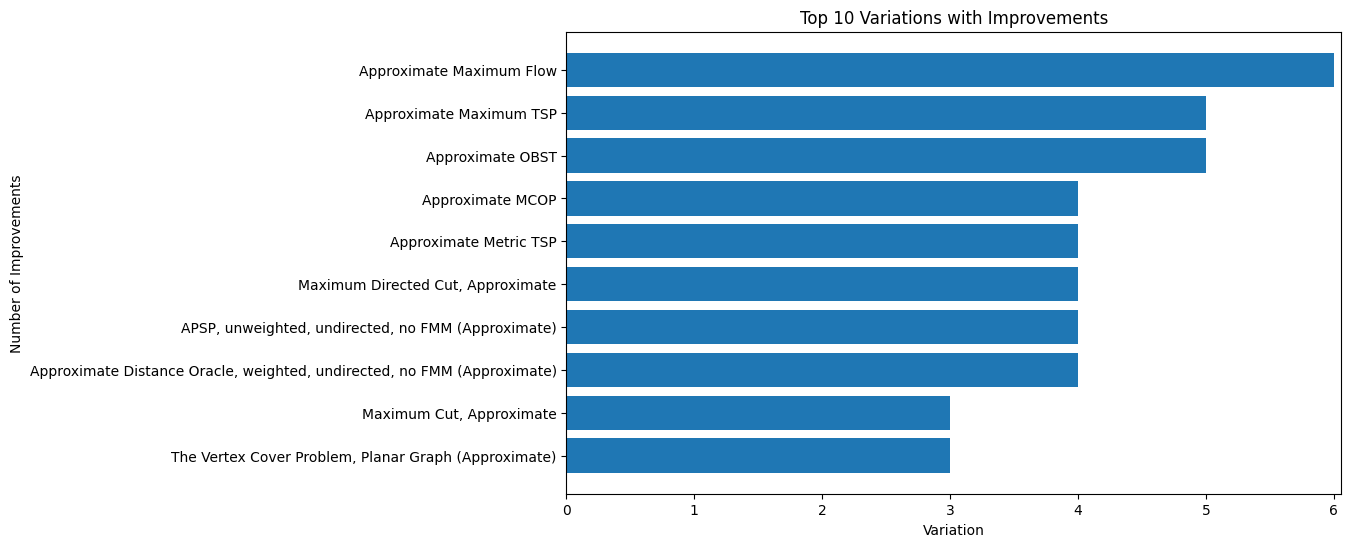

In [9]:
# Plot number of improvements by variation
data = approximation_algorithms

# variation with more improvements
data = data[data['Improvement'] == 1]

# number of improvements by variation
data = data['Variation'].value_counts()

# top 10
data = data.head(10)

fig, ax = plt.subplots()
bar_container = ax.barh(data.index, data.values)

# reverse the order of the y-axis
ax.invert_yaxis()
# set figure size
fig.set_size_inches(10, 6)

plt.margins(x=0.01)

ax.set_xlabel('Variation')

ax.set_ylabel('Number of Improvements')

ax.set_title('Top 10 Variations with Improvements')

plt.show()



In [10]:
data = approximation_algorithms
# filter for Maximum Flow
data = data[data['Variation'] == 'Approximate Maximum Flow']
data

Family Name Looked at?  Relevant?  \
Family Name  Variation                                                         
Maximum Flow Approximate Maximum Flow 32  Maximum Flow          1        1.0   
                                      19  Maximum Flow          1        1.0   
                                      18  Maximum Flow          1        1.0   
                                      20  Maximum Flow          1        1.0   
                                      21  Maximum Flow          1        1.0   
                                      22  Maximum Flow          1        1.0   
                                      23  Maximum Flow          1        1.0   
                                      24  Maximum Flow          1        1.0   
                                      25  Maximum Flow          1        1.0   
                                      26  Maximum Flow          1        1.0   
                                      27  Maximum Flow          1        1.0   
                                      28  Maximum Flow          1        1.0   
                                      34  Maximum Flow          1        1.0   

                                                         Variation  \
Family Name  Variation                                               
Maximum Flow Approximate Maximum Flow 32  Approximate Maximum Flow   
                                      19  Approximate Maximum Flow   
                                      18  Approximate Maximum Flow   
                                      20  Approximate Maximum Flow   
                                      21  Approximate Maximum Flow   
                                      22  Approximate Maximum Flow   
                                      23  Approximate Maximum Flow   
                                      24  Approximate Maximum Flow   
                                      25  Approximate Maximum Flow   
                                      26  Approximate Maximum Flow   
                                      27  Approximate Maximum Flow   
                                      28  Approximate Maximum Flow   
                                      34  Approximate Maximum Flow   

                                                                             Algorithm Name  \
Family Name  Variation                                                                        
Maximum Flow Approximate Maximum Flow 32                             Karger (Corollary 5.4)   
                                      19                                             Karger   
                                      18                                      Goldberg, Rao   
                                      20  Christiano, Kelner, Madry, Spielman, Teng (The...   
                                      21  Christiano, Kelner, Madry, Spielman, Teng (The...   
                                      22  Christiano, Kelner, Madry, Spielman, Teng (The...   
                                      23                    Lee, Rao, Srivastava (Remark 4)   
                                      24                                            Sherman   
                                      25                     Kelner, Lee, Orecchia, Sidford   
                                      26                                               Peng   
                                      27                                            Sherman   
                                      28                                      Sidford, Tian   
                                      34                             Kathuria, Liu, Sidford   

                                          Year  Time Complexity Class  \
Family Name  Variation                                                  
Maximum Flow Approximate Maximum Flow 32  1994                   7.00   
                                      19  1997                   5.50   
                                      18  1998                   6.01   
